In [1]:
import scipy 
from scipy.optimize import linprog
import numpy as np

In [2]:
c = [1,1]
A_ub1 = [[-1,-1]]
b_ub1 = [[-6]]
linprog(c=c,A_ub=A_ub1,b_ub=b_ub1)

     con: array([], dtype=float64)
     fun: 6.000000000001678
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([1.67776903e-12])
  status: 0
 success: True
       x: array([3., 3.])

In [3]:
c = [1,1]
A = -1*np.array([
    [2,1],
    [2,2],
    [1,2],
    [-3,1],
    [1,-3]
])
b = -1*np.array([2,3,2,-6,-6])

solut = linprog(c = c, A_ub = A, b_ub = b)

In [4]:
solut

     con: array([], dtype=float64)
     fun: 1.5000000000042775
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([2.50000000e-01, 8.55493454e-12, 2.50000000e-01, 4.50000000e+00,
       4.50000000e+00])
  status: 0
 success: True
       x: array([0.75, 0.75])

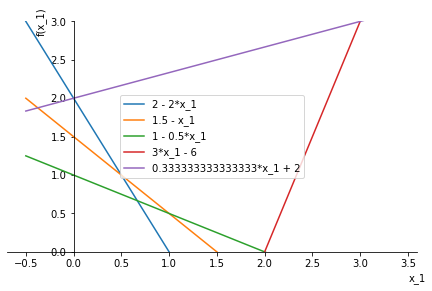

In [5]:
import sympy as sp
from sympy.plotting import plot

x1, x2 = sp.symbols('x_1 x_2')
p1 = plot(2 - 2*x1, 3/2 - x1,1 - 1/2 *x1,-6 + 3*x1,2 + 1/3 *x1,(x1,-1/2,3.4),show = False)
p1.legend = True
p1.ylim = (0,3)
p1.show()

In [19]:
import scipy.optimize
x = np.arange(1,25)
y = np.array([75,77,76,73,69,68,63,59,57,55,54,52,50,50,49,49,49,50,54,56,59,63,67,72])

Fit = np.array([x**3,x**2,x,x**0]).transpose()
Y = y.transpose()

error = lambda u: np.linalg.norm(Y - Fit @ u,2)
scipy.optimize.fmin(func = error, x0=[1,1,1,60])


import timeit
print(timeit.timeit(lambda: print(scipy.optimize.fmin(func = error, x0=[1,1,1,60])) , number=1))
6.123091/ 24

Optimization terminated successfully.
         Current function value: 6.123091
         Iterations: 451
         Function evaluations: 757
Optimization terminated successfully.
         Current function value: 6.123091
         Iterations: 451
         Function evaluations: 757
[ 9.18552584e-03 -1.59522492e-01 -1.74893782e+00  8.02351658e+01]
0.02642849999756436


0.25512879166666663

In [20]:
scipy.optimize.minimize(fun= error,x0=[1,1,1,60], method='Nelder-Mead')

 final_simplex: (array([[ 9.18552584e-03, -1.59522492e-01, -1.74893782e+00,
         8.02351658e+01],
       [ 9.18553702e-03, -1.59523191e-01, -1.74892637e+00,
         8.02351410e+01],
       [ 9.18553262e-03, -1.59522936e-01, -1.74892856e+00,
         8.02351149e+01],
       [ 9.18551642e-03, -1.59521861e-01, -1.74894540e+00,
         8.02351865e+01],
       [ 9.18543268e-03, -1.59518824e-01, -1.74897695e+00,
         8.02352517e+01]]), array([6.12309129, 6.12309129, 6.12309129, 6.12309129, 6.12309129]))
           fun: 6.1230912853267405
       message: 'Optimization terminated successfully.'
          nfev: 757
           nit: 451
        status: 0
       success: True
             x: array([ 9.18552584e-03, -1.59522492e-01, -1.74893782e+00,  8.02351658e+01])

In [21]:
U_sol = np.linalg.pinv(Fit) @ Y

In [22]:
6.123091

6.123091

In [23]:
from numpy.random import randn

def Genetic():
    weight = 40
    mutations = lambda n: randn(n,4) * weight

    m  = 10*2000
    n  = 50
    n2 = 10
    U_0 = np.array([1,1,1,60] *n).reshape(n,4)

    e_0 = 6.123091


    U = U_0
    E = np.zeros(n)
    E_hist=[]
    jgen = 0
    while ((e_0 - E[0])/e_0 >= 0.01) or (jgen <= m):
        jgen+=1
        for j in range(n):
            E[j] = error(U[j])
        sortIndexes = np.argsort(E)
        BestGen = U[sortIndexes[:n2]]
        nextGen = BestGen
        nextGen_mut = np.vstack((BestGen,BestGen,BestGen,BestGen)) + mutations(n-n2)/ (jgen+1)
        U = np.vstack((nextGen,nextGen_mut))
        E_hist.append(E[sortIndexes[0]])
    print(E[0])
    print(U[0])
    print((e_0 - E[0])/e_0*100)

In [24]:
import timeit
#print(timeit.timeit(lambda: Genetic(), number=1))
for i in range(20):
    pass

Text(0, 0.5, 'y')

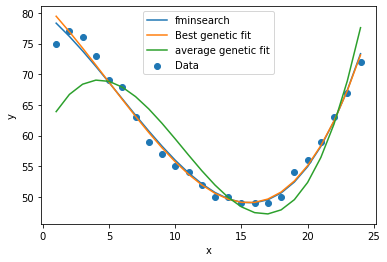

In [34]:
import matplotlib.pyplot as plt
plt.plot(x,Fit @ U_sol)
U_genetic = [8.30041793e-03 ,-1.21700964e-01,-2.22105010e+00 ,8.17972981e+01]
U_average_genetic = [2.22958123e-02, -7.02423277e-01,4.75604243e+00, 5.98320401e+01]
plt.plot(x,Fit @ U_genetic)
plt.plot(x,Fit @ U_average_genetic)

plt.scatter(x,y)

plt.legend(['fminsearch','Best genetic fit','average genetic fit','Data'])
plt.xlabel('x')
plt.ylabel('y')

In [26]:
U_sol

array([ 9.18550049e-03, -1.59521638e-01, -1.74894429e+00,  8.02351779e+01])

In [12]:
x,k,n = sp.symbols("x k n")

In [13]:
a_k = sp.integrate(sp.sin(x) * sp.cos(k*x),(x,0,sp.pi))
a_k = 2/sp.pi * a_k.args[1][0]
a_0 = a_k.subs(k,0)
#b_k = sp.integrate(sp.sin(x) * sp.sin(k*x),(x,0,sp.pi))
#Sins = sp.summation(1/ sp.pi * b_k*sp.sin(k*x),(k,1,n))


In [14]:

f = a_0/2 + sp.summation(a_k * sp.cos(k*x),(k,2,n))

In [15]:
f_2 = sp.lambdify(x,f.subs(n,2))
f_10 = sp.lambdify(x,f.subs(n,10))

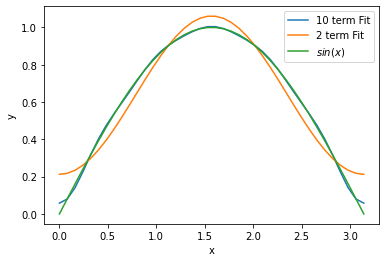

In [28]:
import matplotlib.pyplot as plt


X = np.linspace(0,np.pi,40)
Y_2 = np.array([f_2(x) for x in X])
Y_10 = np.array([f_10(x) for x in X])

#G_10 = np.array([g_10(x) for x in X])

SIN = np.sin(X)

plt.plot(X,Y_10)
plt.plot(X,Y_2)
plt.plot(X,SIN)
plt.legend([r"10 term Fit","2 term Fit",r"$sin(x)$"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [30]:
b_k = sp.integrate(sp.cos(x) * sp.sin(k*x),(x,0,sp.pi))
b_k = 2/sp.pi * b_k.args[1][0]
b_k

2*(k*cos(pi*k)/(k**2 - 1) + k/(k**2 - 1))/pi

In [38]:

f_cos = sp.Sum(b_k * sp.sin(k*x),(k,2,n))
f_cos

Sum(2*(k*cos(pi*k)/(k**2 - 1) + k/(k**2 - 1))*sin(k*x)/pi, (k, 2, n))

In [39]:
f_cos_2 = sp.lambdify(x,f_cos.subs(n,2))
f_cos_10 = sp.lambdify(x,f_cos.subs(n,10))

In [40]:
f_cos

Sum(2*(k*cos(pi*k)/(k**2 - 1) + k/(k**2 - 1))*sin(k*x)/pi, (k, 2, n))

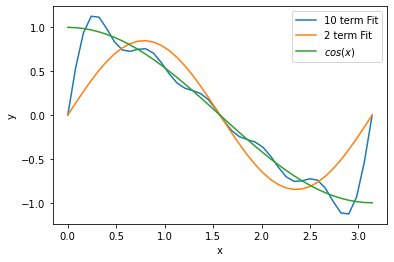

In [41]:
import matplotlib.pyplot as plt


X = np.linspace(0,np.pi,40)
Y_2 = np.array([f_cos_2(x) for x in X])
Y_10 = np.array([f_cos_10(x) for x in X])

COS = np.cos(X)

plt.plot(X,Y_10)
plt.plot(X,Y_2)
plt.plot(X,COS)
plt.legend([r"10 term Fit","2 term Fit",r"$cos(x)$"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
sp.integrate(sp.cos(k*x)*sp.cos(m*x),(x,0,sp.pi))

In [ ]:
sp.integrate(sp.cos(2*x)*sp.cos(2*x),(x,0,2*sp.pi))

In [ ]:
a_k = sp.integrate(sp.sin(x) * sp.cos(k*x),(x,0,sp.pi))
a_k = 2/sp.pi * a_k.args[1][0]
a_0 = a_k.subs(k,0)

f_test = a_0/2 + sp.summation(a_k * sp.cos(k*x),(k,2,n))


In [ ]:
f_10 = sp.lambdify(x,f_test.subs(n,10))

X = np.linspace(0,np.pi,40)

Y_10 = np.array([f_10(x) for x in X])

SIN = np.array([np.sin(x) for x in X])


plt.plot(X,Y_10)
plt.plot(X,SIN)
